(50000, 3586)


logp = -57,487, ||grad|| = 0.43455: 100%|██████████| 482/482 [10:52<00:00,  1.35s/it]         
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 3000/3000 [42:22<00:00,  1.31s/draws]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


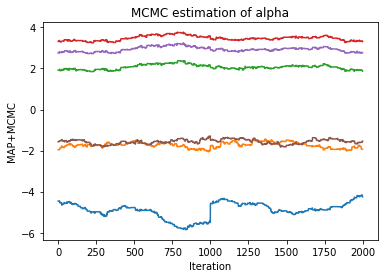

100%|██████████| 2000/2000 [20:13<00:00,  1.70it/s]

测试集准确率：0.840900
Complete time: 4588.993761 s


In [18]:
#贝叶斯多分类逻辑回归实验一：诊断参数收敛
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/mathVR3W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test= train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Normal('beta', mu=0, sd=3, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=6, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    start=pm.find_MAP()  # 参数初猜
    step = pm.Metropolis()#多分类采样#step = pm.NUTS()连续采样
    trace = pm.sample(1000,start=start,step=step,chains=2,cores=2)

#pm.summary(trace)
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('MAP+MCMC')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

(50000, 3586)


logp = -57,453, ||grad|| = 1.0795: 100%|██████████| 424/424 [09:10<00:00,  1.30s/it]          
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 11000/11000 [2:41:08<00:00,  1.29s/draws] 
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


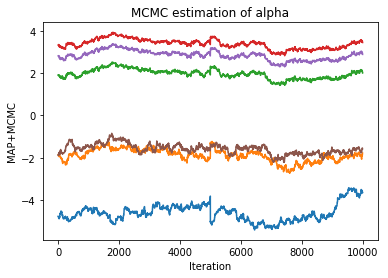

100%|██████████| 10000/10000 [1:53:06<00:00,  1.46it/s] 


测试集准确率：0.841100
Complete time: 17704.150253 s


In [24]:
#贝叶斯多分类逻辑回归实验一：增加采样次数
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/mathVR3W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
lamda=0.001#正则化参数
with pm.Model() as EDP_model:
    beta = pm.Normal('beta', mu=0, sd=3, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=3, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    start=pm.find_MAP()  # 参数初猜
    step = pm.Metropolis()#多分类采样#step = pm.NUTS()连续采样
    trace = pm.sample(5000,start=start,step=step,chains=2,cores=2)

#pm.summary(trace)
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('MAP+MCMC')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

(50000, 3586)


logp = -14,143, ||grad|| = 0.58817: 100%|██████████| 217/217 [04:57<00:00,  1.37s/it]   
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 3000/3000 [46:43<00:00,  1.11draws/s]


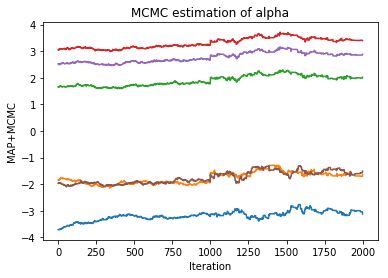

100%|██████████| 2000/2000 [23:46<00:00,  1.51it/s] 

测试集准确率：0.842200
Complete time: 4610.701749 s


In [32]:
#贝叶斯多分类逻辑回归实验一：分布优化
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/mathVR3W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Uniform('beta', lower=0,upper=1, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    start=pm.find_MAP()  # 参数初猜
    step = pm.Metropolis()#多分类采样#step = pm.NUTS()连续采样
    trace = pm.sample(1000,start=start,step=step,chains=2,cores=2)

#pm.summary(trace)
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('MAP+MCMC')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

(50000, 3586)


Average Loss = 43,958: 100%|██████████| 10000/10000 [2:30:05<00:00,  1.12it/s]   
Finished [100%]: Average Loss = 43,832


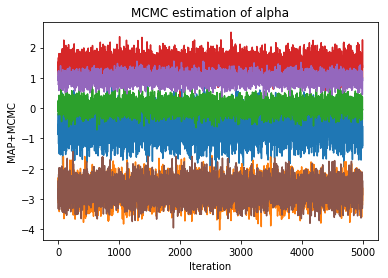

100%|██████████| 5000/5000 [52:23<00:00,  1.59it/s] 


测试集准确率：0.835700
Complete time: 14962.663803 s


In [38]:
#贝叶斯多分类逻辑回归实验一：变分推断+分布选择
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/mathVR3W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    beta = pm.Normal('beta', mu=0, sd=5, shape=(3584,6))
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    inference = pm.ADVI()
    approx = pm.fit(n=10000, method=inference)
    trace = approx.sample(draws=5000)
#pm.summary(trace)
plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('MAP+MCMC')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))

(50000, 3586)


Average Loss = 55,886: 100%|██████████| 10000/10000 [2:28:00<00:00,  1.08it/s]   
Finished [100%]: Average Loss = 55,364


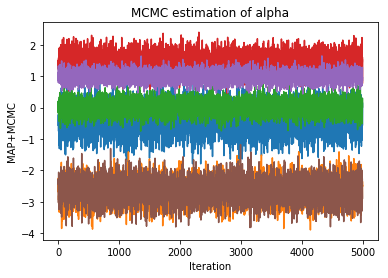

100%|██████████| 5000/5000 [55:40<00:00,  1.51it/s] 


测试集准确率：0.837800
Complete time: 15044.635071 s


In [39]:
#贝叶斯多分类逻辑回归实验一：变分推断+分布选择
import theano
import pymc3 as pm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import theano.tensor as tt
from sklearn import datasets
import time
import numpy as np
import matplotlib.pyplot as plt
starttime = time.time()
#1.加载训练文件
data = pd.read_csv("/data/fjsdata/mathVR3W.csv",sep='|',low_memory=False)#,iterator =True)
#data = data.get_chunk(100)
print (data.shape)
#2.构造训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['quid','qdiff']), data['qdiff'], test_size=.2)#8成训练，2成测试
#3.构建softmax regression model
X_input = theano.shared(X_train.values)#转numpy array
Y_output = theano.shared(Y_train.values)#转numpy array
with pm.Model() as EDP_model:
    #beta = pm.Normal('beta', mu=0, sd=1, shape=(3584,6))
    beta =pm.Exponential('beta', 1, shape=(3584,6))#指数
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=6)
    mu = tt.dot(X_input,beta) + alpha
    p = pm.Deterministic('p', tt.nnet.softmax(mu))
    Y_obs = pm.Categorical('Y_obs', p=p, observed=Y_output)
#4.nuts采样
with EDP_model:
    inference = pm.ADVI()
    approx = pm.fit(n=10000, method=inference)
    trace = approx.sample(draws=5000)

plt.plot(trace['alpha'])#诊断后验参数
plt.xlabel('Iteration')
plt.ylabel('MAP+MCMC')
plt.title('MCMC estimation of alpha')
plt.show()
    
X_input.set_value(X_test.values)##诊断后验参数测试集
Y_output.set_value(Y_test.values)#测试集
with EDP_model:
    ppc = pm.sample_posterior_predictive(trace)#后验预测 
    Y_pred = ppc['Y_obs'].mean(axis=0)
    
print ('测试集准确率：%f'% accuracy_score(Y_test,Y_pred.round()))
endtime = time.time()
print ("Complete time: %f s" % (endtime - starttime))